In [1]:
import torch

from datasets.CIFAR_10_Dataset import CIFAR_10_Dataset, CIFAR_10_Datamodule, apply_masks_to_batch

n_masks_per_image = 2
datamodule = CIFAR_10_Datamodule(num_players=9, num_mask_samples=n_masks_per_image, paired_mask_samples=True)
datamodule.setup()


In [2]:
data = next(iter(datamodule.train_dataloader()))
print(data.keys())

dict_keys(['images', 'labels', 'masks'])


In [3]:
print(f"""
    images shape is {tuple(data['images'].shape)},
    labels shape is {tuple(data['labels'].shape)},
    masks shape is {tuple(data['masks'].shape)}
""")

images = data['images']
labels = data['labels']
masks = data['masks']
print("labels=", list(labels.numpy()))


    images shape is (32, 3, 224, 224),
    labels shape is (32,),
    masks shape is (32, 2, 9)

labels= [6, 1, 8, 8, 2, 9, 9, 1, 6, 3, 3, 0, 2, 7, 7, 6, 6, 7, 1, 6, 9, 5, 7, 1, 9, 7, 0, 0, 5, 8, 9, 1]


frog


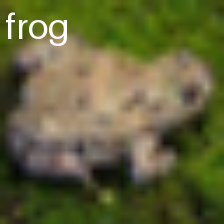

In [4]:
print(datamodule.classes[labels[0]])
CIFAR_10_Dataset.to_image(images[0], label=datamodule.classes[labels[0]])

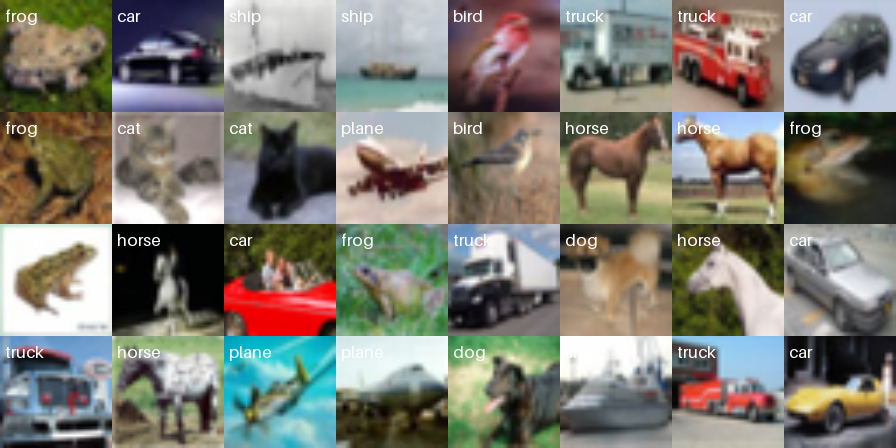

In [5]:
CIFAR_10_Dataset.to_image_grid(images, labels, scale=1/2)

In [6]:
images, masks, labels = apply_masks_to_batch(images, masks, labels)
print(images.shape, labels.shape, masks.shape)

torch.Size([64, 3, 224, 224]) torch.Size([64]) torch.Size([64, 9])


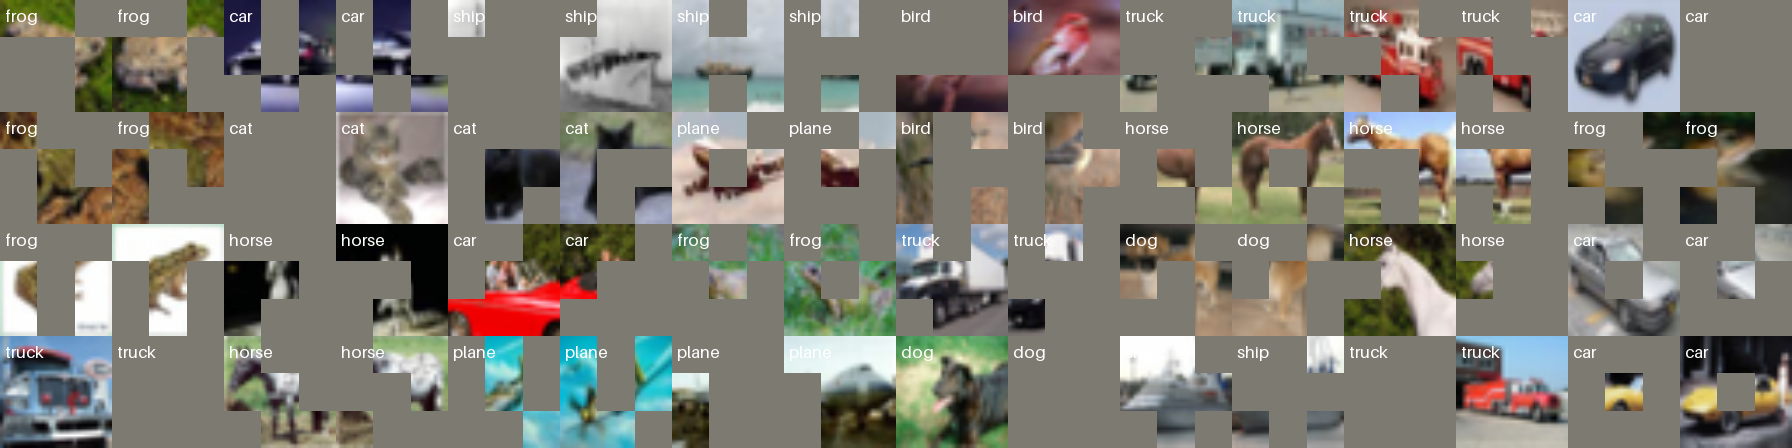

In [7]:
CIFAR_10_Dataset.to_image_grid(images, labels, scale=1/2, n_columns=n_masks_per_image * 8)